# Indain Startup Data Cleaning

In [1]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
df=pd.read_csv('startup_funding.csv')
df.head(10)   # reading first 5 rows of the dataset

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [5]:
df.info()  # Going through the dataset attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [7]:
# Lets start data cleaning column by column. This will make sure that we will not miss any of the column
col=df.columns
print(col)
# Firstly we need to provide relevant name to our columns. So that they are easily addressable and easy to understand.

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')


In [8]:
df.rename(columns={col[0] : 'S_no',
                   col[1]: 'Date',
                   col[2]: 'Startup_Name',
                   col[3]: 'Industry_Vertical',
                   col[5]:'City',
                   col[6]: 'Invester_name',
                   col[7]: 'Investment_Type',
                   col[8]: "Funding_Amount" 
                  },inplace = True)
# Now the columns of our dataset looks more enhanced and easy to understand.

In [9]:
df.columns
# Lets start cleaning the columns one by one.

Index(['S_no', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'City', 'Invester_name', 'Investment_Type', 'Funding_Amount',
       'Remarks'],
      dtype='object')

In [10]:
print(df.Date.dtype) # So, as we can see the dtype of date column or series in object. we need to change it to datatime format.
temp=[]
for x in pd.Series(df['Date'].unique()):
    if len(x) != 10:
        temp.append(x)
print(temp)
df.Date.replace({temp[0]: '05/07/2018',temp[1]: '01/07/2015', temp[2]: '10/07/2015',temp[3]: '22/01/2015'},inplace=True)
# so we have found some error in date column that needs to be fixed


object
['05/072018', '01/07/015', '\\\\xc2\\\\xa010/7/2015', '22/01//2015']


In [11]:
df['Date'] = df['Date'].replace(r'\\xc2\\xa0', '', regex=True)

# Fix common issues with date formatting using regex
def clean_date(date_str):
    # Fix two-digit year if exists
    date_str = re.sub(r'(\d{2}/\d{2}/)(\d{2})$', r'\g<1>20\g<2>', date_str)
    # Fix missing day or month by adding a placeholder day or month
    date_str = re.sub(r'^(\d{1,2}/\d{1,2}/)(\d{4})$', r'\g<1>0\g<2>', date_str)
    # Fix other common issues if any
    return date_str

df['Date'] = df['Date'].apply(clean_date)

# Step 3: Convert to datetime format, setting errors='coerce' for invalid dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

In [12]:
df.info()   # now as you can see our Date column is perfectly cleaned and converted into a date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   S_no               3044 non-null   int64         
 1   Date               3044 non-null   datetime64[ns]
 2   Startup_Name       3044 non-null   object        
 3   Industry_Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City               2864 non-null   object        
 6   Invester_name      3020 non-null   object        
 7   Investment_Type    3040 non-null   object        
 8   Funding_Amount     2084 non-null   object        
 9   Remarks            419 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 237.9+ KB


In [13]:
def clean_name(name):
    # Remove special characters like quotes and escape sequences
    name = name.replace('\\', '').replace('"', '').replace("'", "")
    # Remove URLs
    name = name if not name.startswith('http') else ''
    # Remove extra spaces and make lowercase for standardization
    name = name.strip().lower()
    return name

df['Startup_Names'] = df['Startup_Name'].apply(clean_name)

# Step 2: Drop duplicates based on the cleaned column
df = df[df['Startup_Names'] != '']  # Remove any empty names (if URLs or invalid entries were removed)
df = df.drop_duplicates(subset='Startup_Names').reset_index(drop=True)

# Display the cleaned data
df[['Startup_Names']]

,Startup_Names
0,byju’s
1,shuttl
2,mamaearth
3,fashor
4,pando
...,...
2343,grabhouse.com
2344,printvenue
2345,graphene
2346,simplotel


In [14]:
# Lets move on to the next column i.e Industry_Vertical
print(df.Industry_Vertical.isna().sum()) # this shows we have 112 empty values
df.Industry_Vertical=df.Industry_Vertical.fillna('Undefined') # Replacing the value with Undefined
print('Replaced null values with Undefined')

112
Replaced null values with Undefined


In [15]:
# Lets move on to the next column i.e SubVertical
print(df.SubVertical.isna().sum()) # this column contains 623 empty values
df.SubVertical=df.SubVertical.fillna('Undefined') # Replacing the value with Undefined
print('Replaced null values with Undefined')

623
Replaced null values with Undefined


In [16]:
# Lets move on to the next column i.e City
print('Empty Values : ',df.City.isna().sum())
print('City with most Startup  :  ',df['City'].mode()[0])
# Now we will fill the values with Banglore as it is present in most of the city column
df.City=df.City.fillna('Banglore')

Empty Values :  120
City with most Startup  :   Bangalore


In [17]:
# Lets move on to the next column i.e Invester_Name
print(df.Invester_name.isna().sum())  # So, we have only 20 null values
df.Invester_name=df.Invester_name.fillna('Undefined')

20


In [18]:
# Lets move on to the next column i.e Investment_Type
print(df.Investment_Type.isna().sum())
df.Investment_Type=df.Investment_Type.fillna('Undefined')

4


In [19]:
# Lets move on to the next column i.e Funding_Amount
df.Funding_Amount.isna().sum()  # As it is very clear that without the funding amount funding is worthless
# so,we will remove all the date that does not have funding amount.

np.int64(754)

In [20]:
df=df.dropna(subset=['Funding_Amount'])
# now all the empty or NaN containing Funding Amount is removed

In [21]:
# Lets move on to the next column i.e Remarks
# Their is no need of Remarks Column so we will delete the same.
# del df['Remarks']

In [22]:
df # After all this our Dataset looks clean and now we will go to some other tool create live dasbopard 

,S_no,Date,Startup_Name,Industry_Vertical,SubVertical,City,Invester_name,Investment_Type,Funding_Amount,Remarks,Startup_Names
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,byju’s
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,shuttl
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,mamaearth
3,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,fashor
4,6,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN,pando
...,...,...,...,...,...,...,...,...,...,...,...
2342,3037,2015-01-25,Thrill App,Undefined,Undefined,Banglore,People Group (Shaadi.com),Private Equity,"10,00,000",Strategic Funding,thrill app
2343,3039,2015-01-28,Grabhouse.com,Undefined,Undefined,Banglore,"Kalaari Capital, Sequoia Capital",Private Equity,"25,00,000",Series A,grabhouse.com
2344,3040,2015-01-29,Printvenue,Undefined,Undefined,Banglore,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN,printvenue
2345,3041,2015-01-29,Graphene,Undefined,Undefined,Banglore,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund,graphene


In [23]:
df.Startup_Names=df.Startup_Names.str.title()

In [24]:
df=df.drop(columns=['Startup_Name'])

In [25]:
df

,S_no,Date,Industry_Vertical,SubVertical,City,Invester_name,Investment_Type,Funding_Amount,Remarks,Startup_Names
0,1,2020-01-09,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,Byju’S
1,2,2020-01-13,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,Shuttl
2,3,2020-01-09,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,Mamaearth
3,5,2020-01-02,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,Fashor
4,6,2020-01-13,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN,Pando
...,...,...,...,...,...,...,...,...,...,...
2342,3037,2015-01-25,Undefined,Undefined,Banglore,People Group (Shaadi.com),Private Equity,"10,00,000",Strategic Funding,Thrill App
2343,3039,2015-01-28,Undefined,Undefined,Banglore,"Kalaari Capital, Sequoia Capital",Private Equity,"25,00,000",Series A,Grabhouse.Com
2344,3040,2015-01-29,Undefined,Undefined,Banglore,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN,Printvenue
2345,3041,2015-01-29,Undefined,Undefined,Banglore,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund,Graphene


In [26]:
# Replacing commas from Funding amount
df['Funding_Amount']=df['Funding_Amount'].str.replace(',',"")
df['Funding_Amount']=df['Funding_Amount'].str.replace('+',"")

In [27]:
df.loc[df['Funding_Amount'].str.isalpha(), df.columns[7]] = 0

In [28]:
df.drop(columns='Remarks',inplace=True)

In [29]:
df['Funding_Amount']=df['Funding_Amount'].fillna(0)

In [30]:
df=df[df['Funding_Amount'].notna() & df['Funding_Amount'].str.isdigit()]

In [31]:
df.rename(columns={'Startup_Names':'Startup_name'},inplace=True)

In [32]:
df=df.set_index('S_no')

In [33]:
df

,Date,Industry_Vertical,SubVertical,City,Invester_name,Investment_Type,Funding_Amount,Startup_name
S_no,,,,,,,,
1,2020-01-09,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,Byju’S
2,2020-01-13,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,Shuttl
3,2020-01-09,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,Mamaearth
5,2020-01-02,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,Fashor
6,2020-01-13,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000,Pando
...,...,...,...,...,...,...,...,...
3037,2015-01-25,Undefined,Undefined,Banglore,People Group (Shaadi.com),Private Equity,1000000,Thrill App
3039,2015-01-28,Undefined,Undefined,Banglore,"Kalaari Capital, Sequoia Capital",Private Equity,2500000,Grabhouse.Com
3040,2015-01-29,Undefined,Undefined,Banglore,Asia Pacific Internet Group,Private Equity,4500000,Printvenue


In [34]:
df.Funding_Amount=df.Funding_Amount.astype('float')

In [35]:
df.Funding_Amount=round(((df.Funding_Amount*80)/10000000),2)

In [36]:
total=round(df.Funding_Amount.sum(),2)

In [37]:
df

,Date,Industry_Vertical,SubVertical,City,Invester_name,Investment_Type,Funding_Amount,Startup_name
S_no,,,,,,,,
1,2020-01-09,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1600.00,Byju’S
2,2020-01-13,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,64.39,Shuttl
3,2020-01-09,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,146.87,Mamaearth
5,2020-01-02,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.40,Fashor
6,2020-01-13,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,72.00,Pando
...,...,...,...,...,...,...,...,...
3037,2015-01-25,Undefined,Undefined,Banglore,People Group (Shaadi.com),Private Equity,8.00,Thrill App
3039,2015-01-28,Undefined,Undefined,Banglore,"Kalaari Capital, Sequoia Capital",Private Equity,20.00,Grabhouse.Com
3040,2015-01-29,Undefined,Undefined,Banglore,Asia Pacific Internet Group,Private Equity,36.00,Printvenue


In [38]:
# df.to_csv('clean_data.csv',index=False)

In [39]:
df['Funding_Amount'].max()

np.float64(31200.0)

In [40]:
df.rename(columns={'Funding_Amount': 'Funding_Amount_in_cr'},inplace=True)

In [41]:
df.columns

Index(['Date', 'Industry_Vertical', 'SubVertical', 'City', 'Invester_name',
       'Investment_Type', 'Funding_Amount_in_cr', 'Startup_name'],
      dtype='object')

In [42]:
df.rename(columns={'SubVertical': 'Sub_Vertical'},inplace=True)

In [43]:
a=df.Startup_name.str.lower().unique()

In [44]:
b=df.Startup_name.unique()

In [ ]:
a=pd.Series(b)

In [46]:
a=a.str.strip()
a=a.str.strip(',')
a=a.str.strip('-')

In [47]:
df['Startup_name']=a

In [48]:
df['Investment_Type']=df['Investment_Type'].str.replace('\\n','')
df['Investment_Type']=df['Investment_Type'].str.replace('/','')
df['Investment_Type']=df['Investment_Type'].str.replace('\\',' ')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Funding','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed  Angel Funding','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('SeedAngel Funding','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed  Angle Funding','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Angel  Seed Funding','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Round','Seed Funding Round')

In [49]:
pd.Series(df['Investment_Type'].unique()).sort_values()

22                                     Angel
24                               Angel Round
19                           Corporate Round
40                             Crowd Funding
31                                      Debt
9                               Debt Funding
28               Debt and Preference capital
33                              Debt-Funding
32                                    Equity
36                      Equity Based Funding
14                             Funding Round
29                           Inhouse Funding
15                              Maiden Round
34                                 Mezzanine
21                              Pre-Series A
37                                   Private
27                            Private Equity
0                       Private Equity Round
39                             PrivateEquity
6                         Seed Funding Round
30          Seed Funding Round Angel Funding
12          Seed Funding Round Funding Round
17    Seed

In [50]:
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Funding Round Round','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Funding Round Funding Round','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Funding Round Funding Round','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Funding Round Funding Round Round','Seed Funding Round')



In [51]:
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Funding Round Angel Funding','Seed Funding Round')
df['Investment_Type']=df['Investment_Type'].str.replace('Seed Funding Round Round','Seed Funding Round')

In [52]:
df['Investment_Type']=df['Investment_Type'].str.replace('Debt','Debt Funding')
df['Investment_Type']=df['Investment_Type'].str.replace('Debt-Funding','Debt Funding')

In [53]:
df['Investment_Type']=df['Investment_Type'].str.replace('Debt Funding Funding','Debt Funding')

In [54]:
df['Investment_Type']=df['Investment_Type'].str.replace('Debt Funding-Funding','Debt Funding')

In [55]:
df['Investment_Type']=df['Investment_Type'].str.replace('Equity Based Funding','Equity Funding')
df['Investment_Type']=df['Investment_Type'].str.replace('Equity Funding Funding','Equity Funding')

In [56]:
df['Investment_Type']=df['Investment_Type'].str.title()

In [57]:
df.head()

,Date,Industry_Vertical,Sub_Vertical,City,Invester_name,Investment_Type,Funding_Amount_in_cr,Startup_name
S_no,,,,,,,,
1,2020-01-09,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1600.00,Shuttl
2,2020-01-13,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,64.39,Mamaearth
3,2020-01-09,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,146.87,Fashor
5,2020-01-02,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding Round,14.40,Zomato
6,2020-01-13,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,72.00,Ecozen


In [64]:
pd.Series(df['Invester_name'].unique()).sort_values().head()

331    "Kedaraa Capital, Ontario Teachers\\'"
93                   021 Capita, Binny Bansal
348                                    1Crowd
725             1Crowd (through crowdfunding)
253                     1Crowd, Ankur Capital
dtype: object

In [76]:
for x in df.columns:
    if x not in ('Funding_Amount_in_cr','Date'):
        df[x]=df[x].str.strip()
        df[x]=df[x].str.strip(',')
        df[x]=df[x].str.strip('.')
        df[x]=df[x].str.strip('\\')
        df[x]=df[x].str.strip('|')
        df[x]=df[x].str.strip('"')
        df[x]=df[x].str.strip('\\')
        df[x]=df[x].str.strip('#')
        df[x]=df[x].str.strip('@')
        df[x]=df[x].str.strip('&')
        df[x]=df[x].str.strip()

In [77]:
df.head()

,Date,Industry_Vertical,Sub_Vertical,City,Invester_name,Investment_Type,Funding_Amount_in_cr,Startup_name
S_no,,,,,,,,
1,2020-01-09,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1600.00,Shuttl
2,2020-01-13,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,64.39,Mamaearth
3,2020-01-09,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,146.87,Fashor
5,2020-01-02,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding Round,14.40,Zomato
6,2020-01-13,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,72.00,Ecozen


In [80]:
df.groupby('Invester_name')['Funding_Amount_in_cr'].sum().loc[x]

np.float64(20000.0)

In [2]:
df= pd.read_csv('clean_data.csv')

In [3]:
df

,Date,Industry_Vertical,Sub_Vertical,City,Invester_name,Investment_Type,Funding_Amount_in_cr,Startup_name
0,09-01-2020,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1600.00,Shuttl
1,13-01-2020,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,64.39,Mamaearth
2,09-01-2020,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,146.87,Fashor
3,02-01-2020,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding Round,14.40,Zomato
4,13-01-2020,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,72.00,Ecozen
...,...,...,...,...,...,...,...,...
1569,25-01-2015,Undefined,Undefined,Banglore,People Group (Shaadi.com),Private Equity,8.00,NaN
1570,28-01-2015,Undefined,Undefined,Banglore,"Kalaari Capital, Sequoia Capital",Private Equity,20.00,NaN
1571,29-01-2015,Undefined,Undefined,Banglore,Asia Pacific Internet Group,Private Equity,36.00,NaN
1572,29-01-2015,Undefined,Undefined,Banglore,KARSEMVEN Fund,Private Equity,6.60,NaN


In [4]:
df['City'].unique()

array(['Bengaluru', 'Gurgaon', 'Mumbai', 'Chennai', 'Pune', 'Noida',
       'Faridabad', 'San Francisco', 'San Jose', 'Amritsar', 'Delhi',
       'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville', 'Menlo Park',
       'New Delhi', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Andheri', 'Chembur', 'Haryana', 'New York', 'Karnataka',
       'Mumbai/Bengaluru', 'Bhopal', 'Bengaluru and Gurugram',
       'India/Singapore', 'India/US', 'Nagpur', 'Indore', 'Jaipur',
       'California', 'India', 'Ahemadabad', 'Rourkela', 'Bhubneswar',
       'Chandigarh', 'Delhi & Cambridge', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', 'Surat', 'Goa', 'Ahmedabad', 'Gaya',
       'Vadodara', 'Missourie', 'Panaji', 'Gwalior', 'Kerala', 'Banglore',
       'Lucknow', 'Trivandrum', 'SFO / Bangalore', 'Pune / Dubai',
       'Varanasi', 'New Delhi / US', 'Mumbai / UK', 'Kanpur',
       'Hyderabad/USA', 'Boston', 'Bangalore / Palo Alto', 'Mumbai / NY',
       'USA/India', 'Belgaum', 'Ba

In [6]:
df['Industry_Vertical'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'Fashion and Apparel',
       'Logistics', 'Hospitality', 'Technology', 'Aerospace',
       'B2B-focused foodtech startup', 'Finance', 'Video', 'Gaming',
       'Software', 'Health and wellness', 'Education', 'B2B Marketing',
       'Fin-Tech', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Health Care', 'Customer Service', 'B2B',
       'Advertising & Marketing Community Networking platform', 'IoT',
       'Information Technology', 'Consumer Technology',
       'Health and Wellness', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'Consumer Goods',
       'Food & Beverages', 'Ed-Tech', 'Compliance', 'Transport', 'Tech',
       'Luxury Label', 'Waste Management Service', 'Deep-Tech', 'Energy',
       'Digital Media', 'Services', 'Saas', 'Automobile', 'Agtech',
       'Social Media', 'Nanotechnology', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, Ec

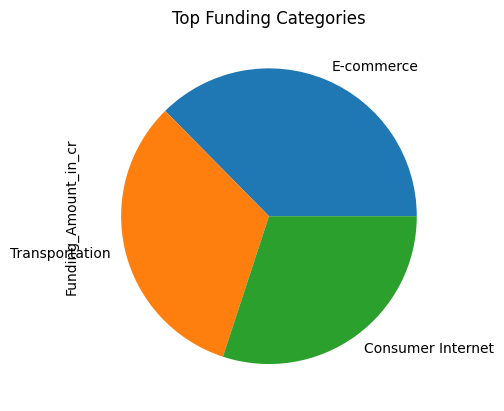

In [21]:
top = df.groupby('Industry_Vertical')['Funding_Amount_in_cr'].sum().sort_values(ascending =False).head(3)
top.plot(kind='pie',title='Top Funding Categories',legend=False);

In [15]:
top

Industry_Vertical
E-commerce           35899.57
Transportation       31293.06
Consumer Internet    28844.34
Name: Funding_Amount_in_cr, dtype: float64

In [22]:
def create_pattern(n=5):
    for i in range(n):
        for j in range(n):
            # Conditions to print the pattern
            if (i == j) or (i + j == n - 1) or (i == 0 or i == n - 1) or (j == 0 or j == n - 1):
                if (i + j == n - 1 and i != 0 and i != n - 1):  # Middle diagonal with $
                    print("$", end=" ")
                else:
                    print("*", end=" ")
            else:
                print(" ", end=" ")
        print()

# Call the function to display the pattern
create_pattern(5)


* * * * * 
* *   $ * 
*   $   * 
* $   * * 
* * * * * 


In [28]:
for x in range(5):
    for y in range(5):
        if x == 0 or x == 4:
            if y==0 or y==4:
                print('$',end =' ')
            else:
                print('*',end =' ')
        elif:
            if x==1 or x==3:
                if y==
        else:
            print('*',end =' ')
         
    print()    
            

SyntaxError: invalid syntax (937208689.py, line 8)